In [141]:
import numpy as np
import idx2numpy as idx
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

# Read Data

In [117]:
X_train = idx.convert_from_file('../train-images-idx3-ubyte')
X_test = idx.convert_from_file('../t10k-images-idx3-ubyte')
Y_train = idx.convert_from_file('../train-labels-idx1-ubyte')
Y_test = idx.convert_from_file('../t10k-labels-idx1-ubyte')

### Let's have a look at some of the images in our train data

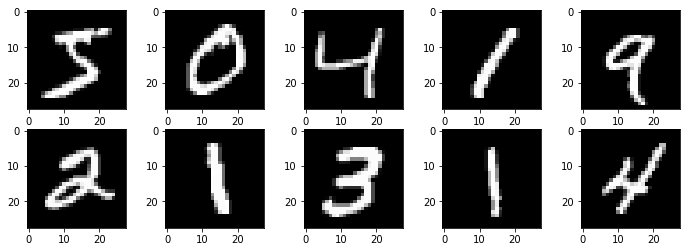

In [45]:
fig = plt.figure(figsize=(12, 4))
for i in range(1, 11):
    img = X_train[i - 1]
    fig.add_subplot(2, 5, i)
    plt.imshow(img, cmap='gray')
plt.show()

# Build CNN Model

In [127]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator

In [128]:
model = Sequential()
# Convolution layer
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())

# Fully connected layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [129]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [121]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/=255
X_test/=255
Y_train = keras.utils.to_categorical(Y_train, 10)
Y_test = keras.utils.to_categorical(Y_test, 10)

In [131]:
history = model.fit(X_train, Y_train, validation_split=0.1, batch_size=30, epochs=10)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 167s 3ms/step - loss: 0.1438 - acc: 0.9551 - val_loss: 0.0551 - val_acc: 0.9858
Epoch 2/10
54000/54000 [==============================] - 166s 3ms/step - loss: 0.0683 - acc: 0.9779 - val_loss: 0.0578 - val_acc: 0.9847
Epoch 3/10
54000/54000 [==============================] - 162s 3ms/step - loss: 0.0481 - acc: 0.9842 - val_loss: 0.0535 - val_acc: 0.9850
Epoch 4/10
54000/54000 [==============================] - 165s 3ms/step - loss: 0.0393 - acc: 0.9869 - val_loss: 0.0468 - val_acc: 0.9877
Epoch 5/10
54000/54000 [==============================] - 166s 3ms/step - loss: 0.0297 - acc: 0.9902 - val_loss: 0.0420 - val_acc: 0.9888
Epoch 6/10
54000/54000 [==============================] - 165s 3ms/step - loss: 0.0271 - acc: 0.9905 - val_loss: 0.0439 - val_acc: 0.9892
Epoch 7/10
54000/54000 [==============================] - 166s 3ms/step - loss: 0.0226 - acc: 0.9924 - val_loss: 0.0395 - v

### Let's plot the training and validation curves for loss and accuracy

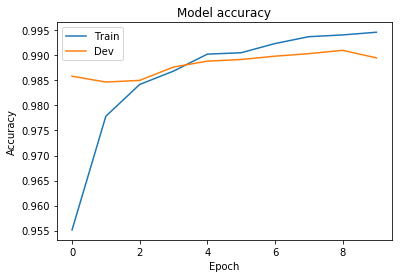

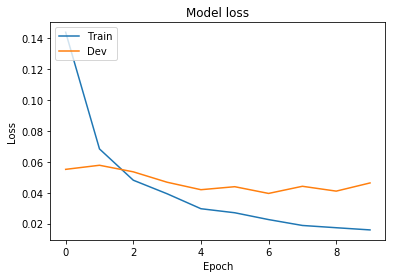

In [133]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Dev'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Dev'], loc='upper left')
plt.show()

### Let's evaluate our model's performance on test data

In [134]:
evaluation = model.evaluate(X_test, Y_test, batch_size=25)

10000/10000 [==============================] - 7s 705us/step


In [143]:
print("Test accuracy = ", round(evaluation[1] * 100, 2), "%")

Test accuracy =  98.93 %


In [150]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
y_test = np.argmax(Y_test, axis=1)

In [152]:
# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred, labels=[i for i in range(10)]))

Confusion Matrix:
[[ 975    0    2    0    0    0    1    1    0    1]
 [   0 1130    3    0    0    0    2    0    0    0]
 [   1    1 1024    0    1    0    0    5    0    0]
 [   0    0    2  998    0    5    0    2    3    0]
 [   0    0    0    0  970    0    2    0    0   10]
 [   2    0    1    4    0  877    5    0    2    1]
 [   4    1    0    0    3    1  948    0    1    0]
 [   1    1    5    0    0    0    0 1016    1    4]
 [   2    1    1    1    0    0    1    0  963    5]
 [   2    1    1    1    3    0    0    5    4  992]]


In [155]:
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       1.00      1.00      1.00      1135
          2       0.99      0.99      0.99      1032
          3       0.99      0.99      0.99      1010
          4       0.99      0.99      0.99       982
          5       0.99      0.98      0.99       892
          6       0.99      0.99      0.99       958
          7       0.99      0.99      0.99      1028
          8       0.99      0.99      0.99       974
          9       0.98      0.98      0.98      1009

avg / total       0.99      0.99      0.99     10000

